In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# TP2

### Alumno: Rafael de Beni

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral. 

In [73]:
def create_gauss_filter(h, w, k_size, sigma):

    # Get a gaussian kernel for each dimension
    kH = cv2.getGaussianKernel(ksize=h, sigma=sigma)
    kW = cv2.getGaussianKernel(ksize=w, sigma=sigma)

    #Multiply kH and kW to get a 2d kernel
    gaussian_filter = np.dot(kH, kW.T)

    #Get the fourier transform of the gaussian filter
    fft = np.fft.fft2(gaussian_filter)
    #fft = np.fft.fftshift(fft)
    #fft = 20*np.log(np.abs(fft))


    return gaussian_filter, fft
    #

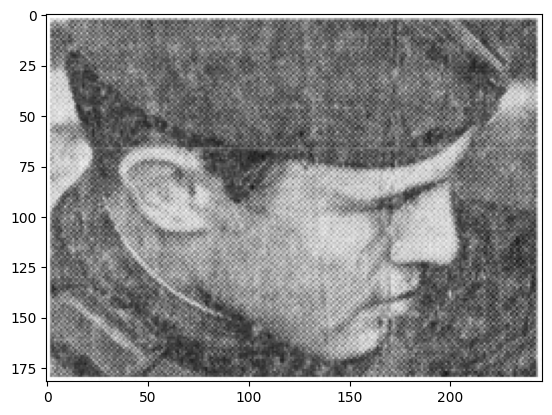

In [87]:
image = cv2.imread(os.path.join(os.getcwd(), 'TP2','image.png'), cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [88]:
gauss, fft = create_gauss_filter(image.shape[0], image.shape[1], 15, 3)

In [89]:
gauss.shape, fft.shape

((182, 246), (182, 246))

2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

Method:

Input: Image I of size M×N.

Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure

Step 1: Compute F which is the Fourier Transform representation of image I

Step 2: Find Fc which is obtained by shifting the origin of F to centre.

Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier 
transform of image I.

Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.

Step 5: Calculate Th = the total number of pixels in F whose pixel value > thres, where thres = M/1000.

Step 6: Calculate Image Quality measure (FM) from equation (1).


(1)  ImageQualityMeasure (FM) = Th/(M*N)

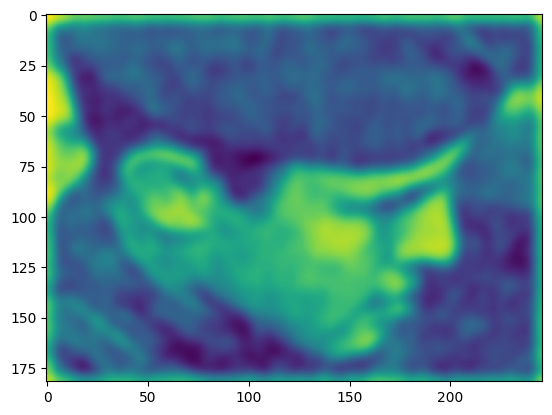

In [90]:
#Gaussian Filter
gauss_image = cv2.filter2D(image,-1,gauss)
plt.imshow(gauss_image)


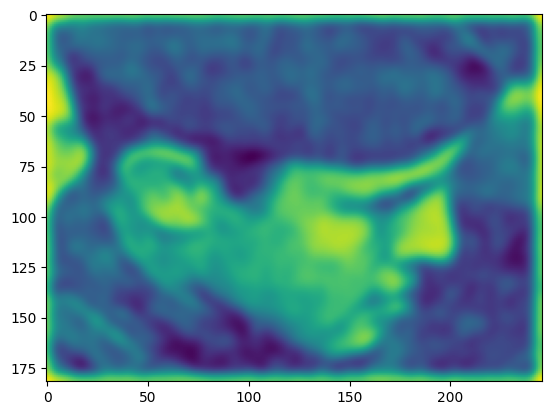

In [91]:
#FFT Filter
img_fft = np.fft.fft2(image)
filtered = img_fft * fft

fft_image = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))


#fft_image = cv2.filter2D(image,-1,fft)
plt.imshow(fft_image)

In [92]:
def image_quality_measure(image):
    F = np.fft.fft2(image)
    Fc = np.fft.fftshift(F)
    AF = 20*np.log(np.abs(Fc))
    M = np.max(AF)
    Th = (F>(M/1000)).sum()
    FM = Th/(image.shape[0]*image.shape[1])
    return FM

In [93]:
image_quality_measure(fft_image)

0.16552756186902529

In [94]:
image_quality_measure(gauss_image)

0.49763244885196106

3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [97]:
def energy_laplacian(image):
    return np.sum(cv2.Laplacian(image, cv2.CV_64F)**2)

In [100]:
energy_laplacian(gauss_image), energy_laplacian(fft_image)

(260494.0, 301603.12962114374)